# Big Data Application: Modeling for Crop Yield Estimation

This jupyter notebook is addressed for creating model that can estimate crop yield in North Dakota, United States. The detail workflow of this project can be seen in [here](https://drive.google.com/file/d/1u3jHTnLqoxMca7SRzgnvGjP-iBvfTnls/view?usp=sharing).

## 0. Install & Load Packages

In [3]:
#install packages
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 4.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 8.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 8.9 MB/s eta 0:00:0

In [4]:
#load packages

#packages for manipulating dataframe
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

#packages for machine learning
##train-test-split
from sklearn.model_selection import train_test_split

##method 1: Linear Regression (LR)

##method 2: Random Forest Regressor (RF)

##method 3: Gradient Boosting Regressor (XGB)

##method 4: Artificial Neural Network (ANN)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##cross validation

##evaluation metrics (R2 and RMSE)
from sklearn.metrics import r2_score, mean_squared_error

#data visualization
import matplotlib.pyplot as plt

## 1. Load & Cleaning Data

In [56]:
#load data
soybean_2018 = pd.read_csv('https://www.dropbox.com/scl/fi/7oje7pt1drpmurfqfaa2t/standardized_2018_County_Summary_Merged.csv?rlkey=i1ka8sg8g4vdykazjpkfjnp2a&dl=1')
soybean_2019 = pd.read_csv('https://www.dropbox.com/scl/fi/72z6twn70nd22tnrmzn1y/standardized_2019_County_Summary_Merged.csv?rlkey=48zahb5ad25gfomzkyf3ghnjp&dl=1')
soybean_2020 = pd.read_csv('https://www.dropbox.com/scl/fi/37hczf92ev9n6vkd5tzuc/standardized_2020_County_Summary_Merged.csv?rlkey=pviu2572il5prpt69j13o3rux&dl=1')
soybean_2021 = pd.read_csv('https://www.dropbox.com/scl/fi/87vyoohpo80wyd9nyk0y9/standardized_2021_County_Summary_Merged.csv?rlkey=sh0gydlfw56tfjbp9zh3kqjyd&dl=1')
soybean_2022 = pd.read_csv('https://www.dropbox.com/scl/fi/jvv0iugqk9x045awb7ivk/standardized_2022_County_Summary_Merged.csv?rlkey=yx8yzpy8idff7761jpsmvgkjn&dl=1')
soybean_2023 = pd.read_csv('https://www.dropbox.com/scl/fi/09ger7p2qetczj4p6u0nk/standardized_2023_County_Summary_Merged.csv?rlkey=va8suq9c9wt0psoy0f1iden9m&dl=1')

In [57]:
soybean_list = [soybean_2018, soybean_2019, soybean_2020, soybean_2021, soybean_2022, soybean_2023]
soybean_df = pd.concat(soybean_list)
soybean_df = soybean_df.drop(['NAME','GEOID'], axis=1)
soybean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 0 to 52
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LST     316 non-null    float64
 1   SMS     316 non-null    float64
 2   SAR     316 non-null    float64
 3   PA      316 non-null    float64
 4   NDVI    316 non-null    float64
 5   YIELD   316 non-null    float64
dtypes: float64(6)
memory usage: 17.3 KB


<Axes: >

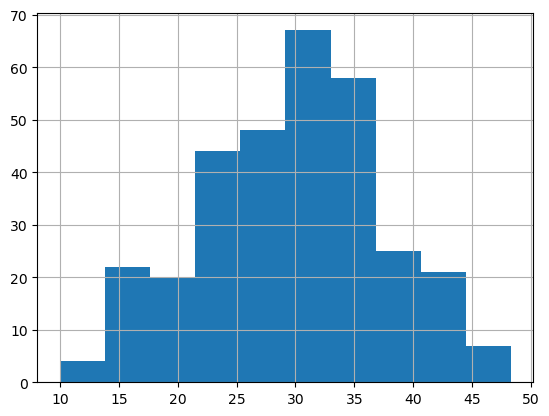

In [58]:
soybean_df.YIELD.hist()

## 2. Train & Test Data Split

In [59]:
#split the dataset
X = soybean_df.drop('YIELD', axis=1)
y = soybean_df['YIELD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Model Training and Parameter Tuning

### 3.1. Linear Regression (LR)

In [ ]:
model_lr =

### 3.2. Random Forest Regressor (RF)

In [ ]:
model_rf =

### 3.3. Gradient Boosting Regressor (XGB)

In [ ]:
model_xgb =

### 3.4. Artificial Neural Network (ANN)

In [60]:
model_ann = keras.Sequential([
    layers.Input(shape=(5,)),  # Input layer
    layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(64, activation='relu'),  # Additional hidden layer
    layers.Dropout(0.3),  # Another dropout layer
    layers.Dense(1)  # Output layer
])

#measuring the training with certain metrics
model_ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [61]:
#train the model
model_ann.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.0000e+00 - loss: 911.9358 - val_accuracy: 0.0000e+00 - val_loss: 873.6630
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 932.7919 - val_accuracy: 0.0000e+00 - val_loss: 832.6583
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 865.7805 - val_accuracy: 0.0000e+00 - val_loss: 781.2476
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 781.4777 - val_accuracy: 0.0000e+00 - val_loss: 715.8627
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 739.5483 - val_accuracy: 0.0000e+00 - val_loss: 634.5937
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 638.0082 - val_accuracy: 0.0000e+00 - val_loss: 538.2881
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 498.4451 - val_accuracy: 0.0000e+00 - val_loss: 431.7560
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━

## 4. Model Evaluation and Performance Comparison

Comparing the performance with using R2 and Root Mean Squared Error (RMSE).

### 4.1. E. Linear Regression (LR)

### 4.2. E. Random Forest Regressor (RF)

### 4.3. E. Gradient Boosting Regressor (XGB)

### 4.4. E. Artificial Neural Network (ANN)

In [62]:
#predictions
y_pred_train_ann = model_ann.predict(X_train).flatten()
y_pred_test_ann = model_ann.predict(X_test).flatten()

#Compute R2 and RMSE
r2_train_ann = np.round(r2_score(y_train, y_pred_train_ann),2)
r2_test_ann = np.round(r2_score(y_test, y_pred_test_ann),2)
rmse_train_ann = np.round(np.sqrt(mean_squared_error(y_train, y_pred_train_ann)),2)
rmse_test_ann = np.round(np.sqrt(mean_squared_error(y_test, y_pred_test_ann)),2)

#print the result
print("Train R2:", r2_train_ann)
print("Test R2:", r2_test_ann)
print("Train RMSE:", rmse_train_ann)
print("Test RMSE:", rmse_test_ann)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train R2: 0.59
Test R2: 0.44
Train RMSE: 5.0
Test RMSE: 5.32


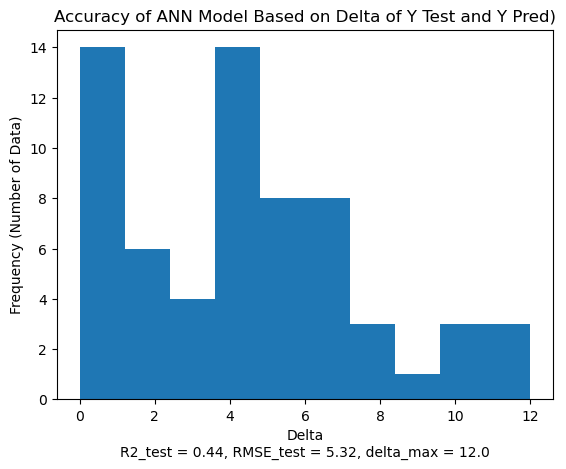

In [63]:
#crosscheck the y value between real and predicted
crosscheck_y_dict = {
    'y_test' : y_test,
    'y_pred' : np.round(y_pred_test_ann,0),
    'delta' : np.abs(np.round((y_test - y_pred_test_ann),0))
}

#plotting histogram
crosscheck_y_df = pd.DataFrame(crosscheck_y_dict)
plt.hist(crosscheck_y_df['delta'], bins=10)
plt.xlabel(f'Delta\nR2_test = {r2_test_ann}, RMSE_test = {rmse_test_ann}, delta_max = {crosscheck_y_df.delta.max()}')
plt.ylabel('Frequency (Number of Data)')
plt.title(f"Accuracy of ANN Model Based on Delta of Y Test and Y Pred)")
plt.show()

### 4.5. Model Performance Comparison

In [64]:
#please input your metrics in here
metrics_dict = {
    'metrics': ["Train R2","Test R2","Train RMSE","Test RMSE"],
    'LR': ["Train R2","Test R2","Train RMSE","Test RMSE"],
    'RF': ["Train R2","Test R2","Train RMSE","Test RMSE"],
    'XGB': ["Train R2","Test R2","Train RMSE","Test RMSE"],
    'ANN': [r2_train_ann, r2_test_ann, rmse_train_ann, rmse_test_ann]
}

#create dataframe
metrics_df = pd.DataFrame(metrics_dict)
metrics_df.set_index('metrics')

,LR,RF,XGB,ANN
metrics,,,,
Train R2,Train R2,Train R2,Train R2,0.59
Test R2,Test R2,Test R2,Test R2,0.44
Train RMSE,Train RMSE,Train RMSE,Train RMSE,5.00
Test RMSE,Test RMSE,Test RMSE,Test RMSE,5.32


Based on the comparison, it can be said that the best model that can be used for estimating crop yield is []. From this point, [] model would be used for estimation phase (step 5).

## 5. Crop Yield Estimation and Export Result